In [16]:
#|default_exp app_v1

## Reimplementing DiffEdit

In this notebook we're going to reimplement the semantic image editing process illustrated in the [DiffEdit](https://arxiv.org/abs/2210.11427) paper. In the paper, the authors proposed using text input to create a mask of the queried object, and essentially using an img2img type of processing, such that changes could be made to the object without making changes to the context of the image. 

## Example

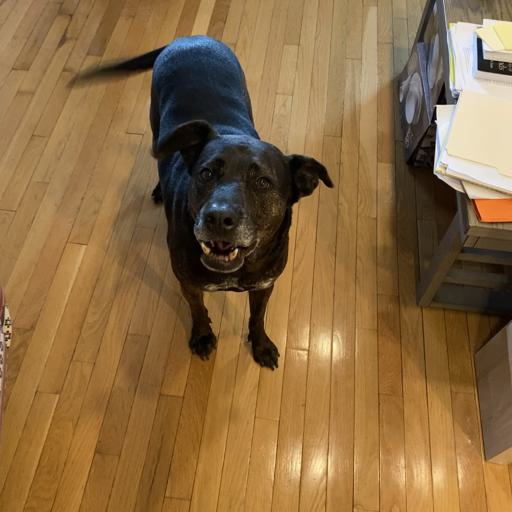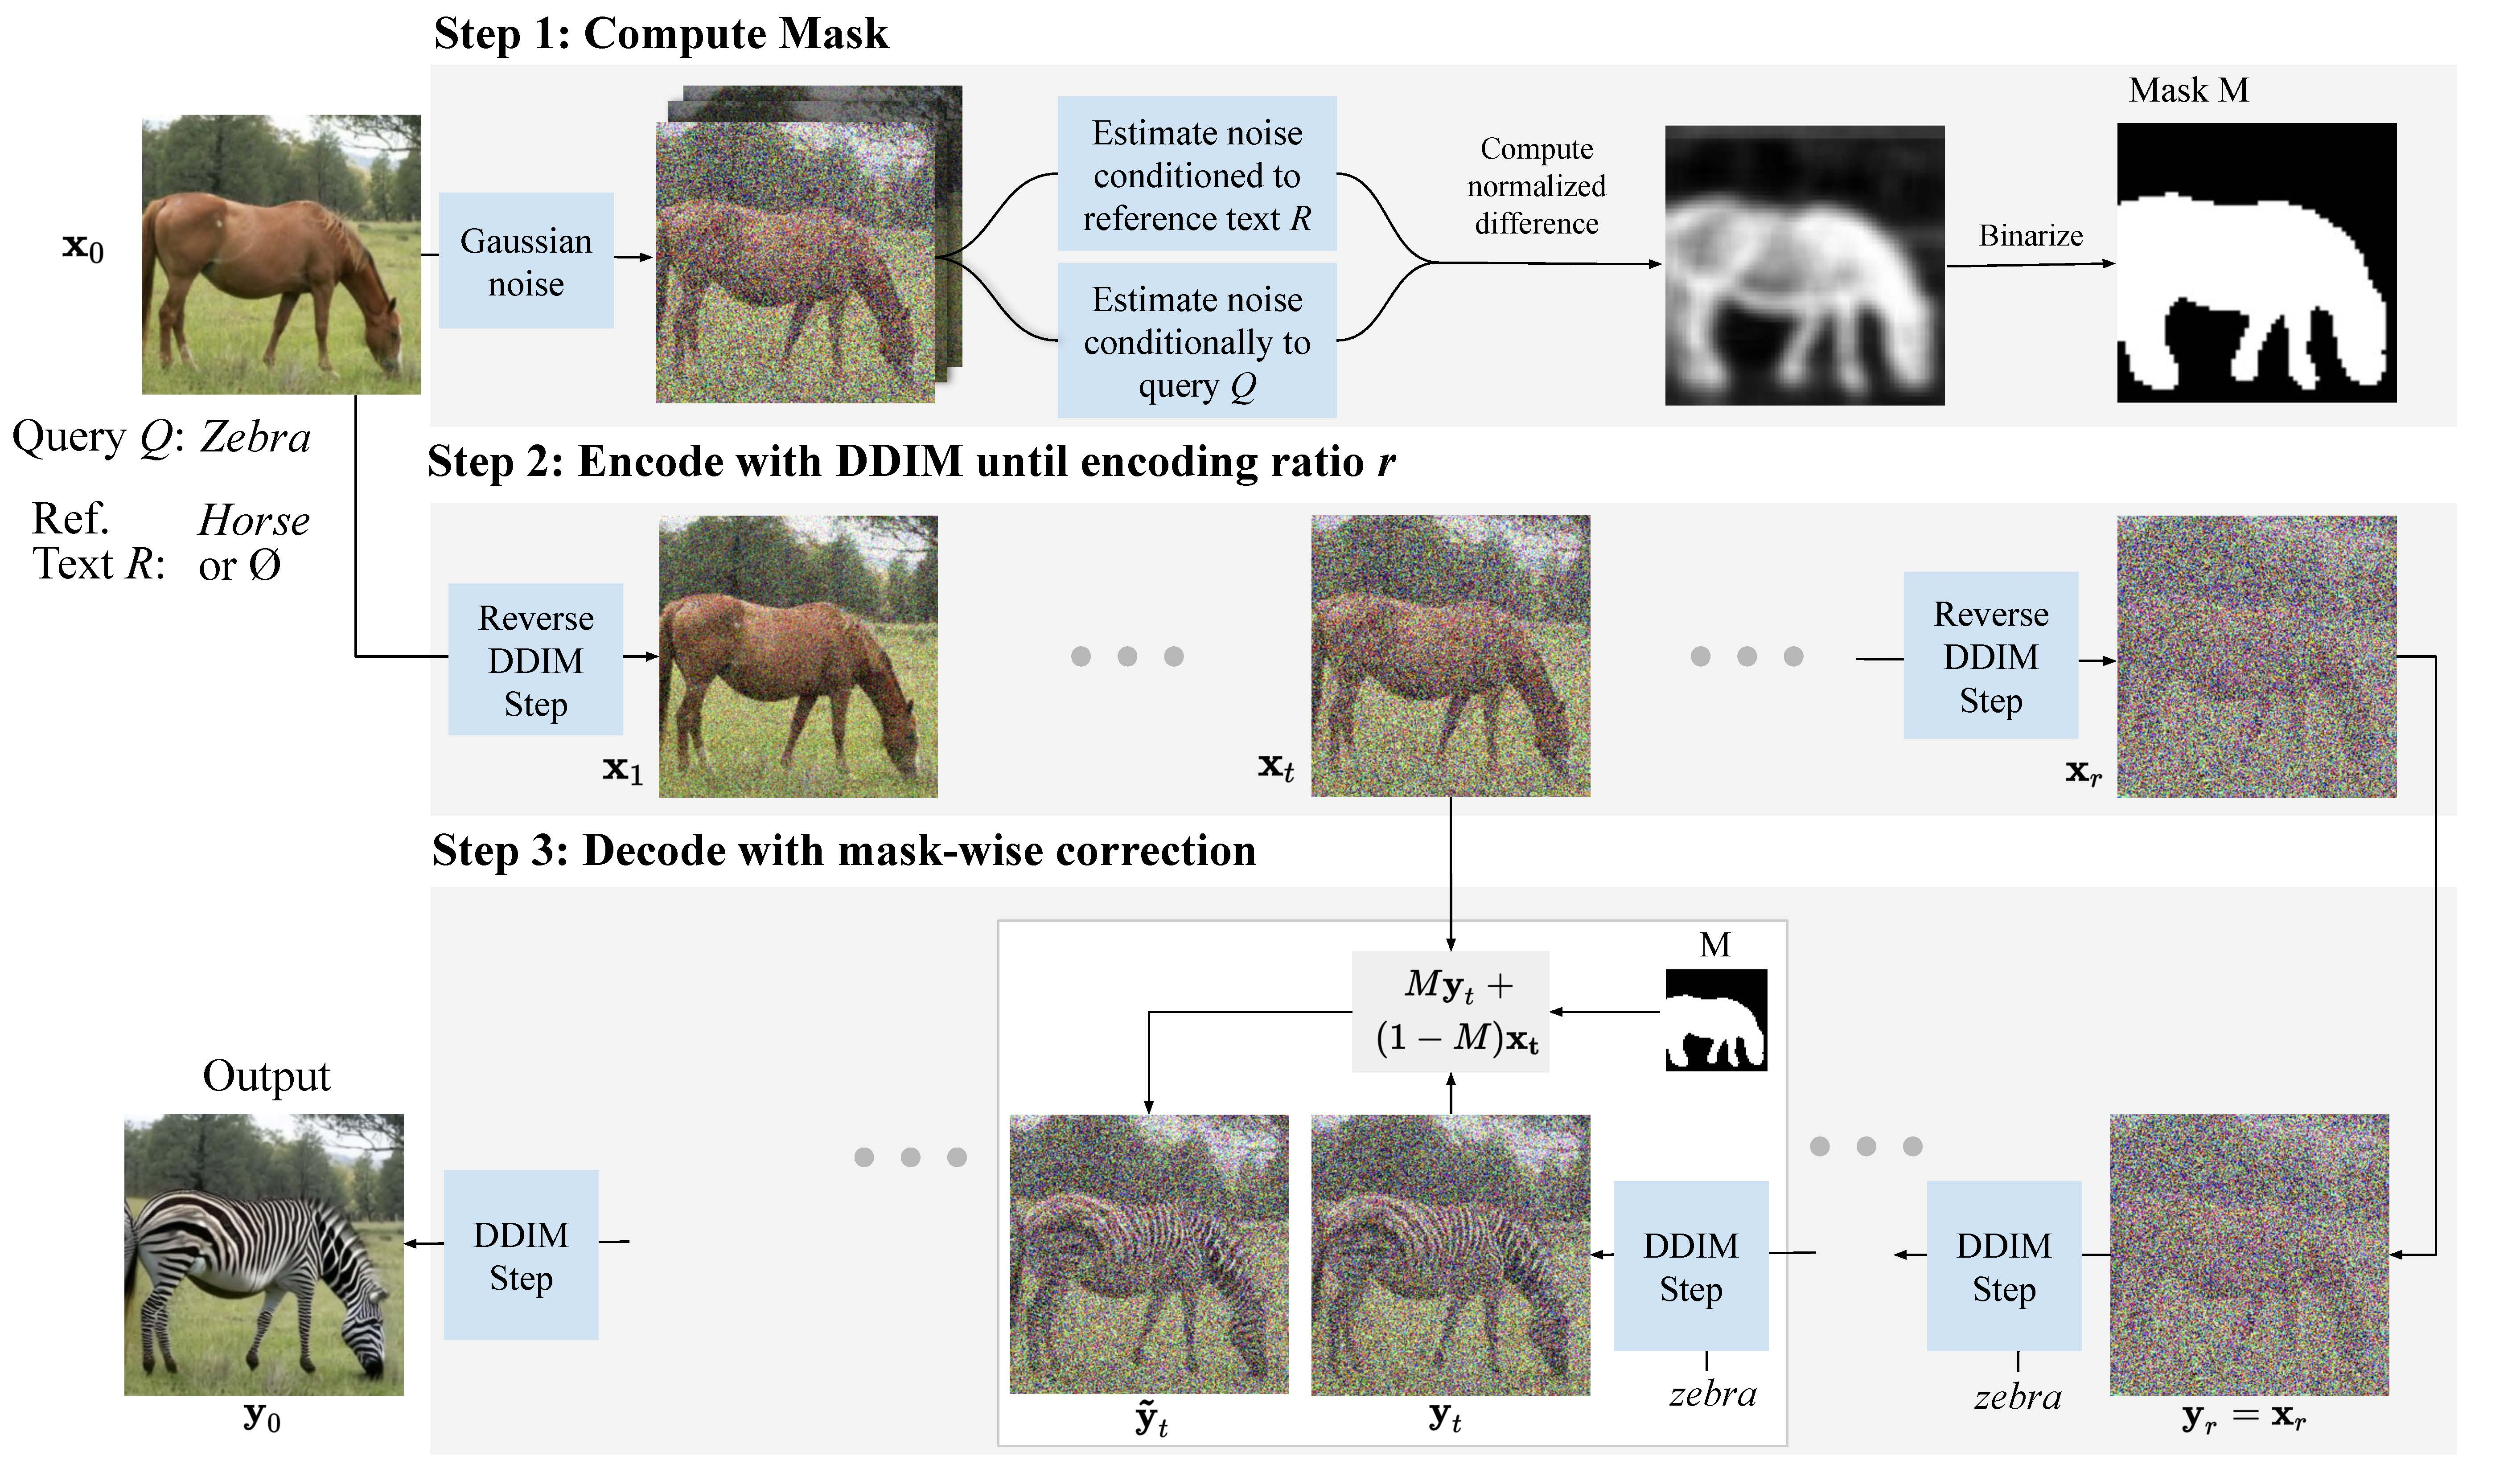

In [33]:
#| export
import torch
from transformers import CLIPTextModel, CLIPTokenizer
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from PIL import Image
from IPython.display import display

import logging

logging.disable(logging.WARNING)
torch.manual_seed(1);

### CLIP Tokenizer and Text Encoder

In [8]:
#| export
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14", torch_dtype=torch.float16)
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14", torch_dtype=torch.float16).to("cuda")

### VAE and UNET

In [11]:
#| export
from diffusers import AutoencoderKL, UNet2DConditionModel

In [12]:
#| export
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema", torch_dtype=torch.float16).to("cuda")
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet", torch_dtype=torch.float16).to("cuda")

### Scheduling

In [14]:
#| export
from diffusers import LMSDiscreteScheduler

In [15]:
scheduler = LMSDiscreteScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")

### Parameters for Generation

In [18]:
#| export
q = ["dog"]
r = ["cat"]

height = 512
width = 512
num_inference_steps = 70
guidance_scale = 7.5
batch_size = 1

### Tokenize the text

In [24]:
q_input = tokenizer(
    q, padding="max_length", max_length=tokenizer.model_max_length, 
    truncation=True, return_tensors="pt"
)
r_input = tokenizer(
    r, padding="max_length", max_length=tokenizer.model_max_length, 
    truncation=True, return_tensors="pt"
)

### Import Image

In [34]:
im = Image.open('imgs/IMG_4104_512.jpg')

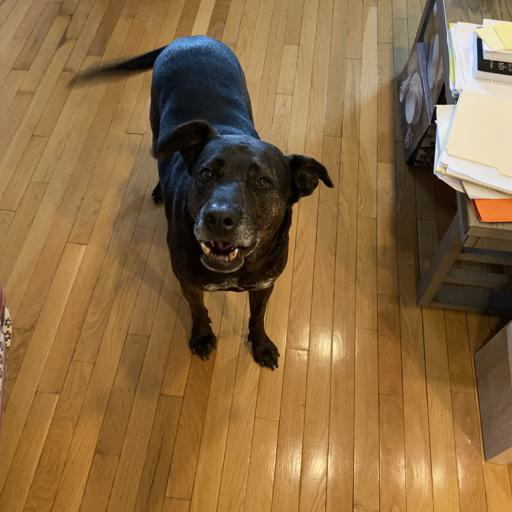

In [36]:
im

### Create Noise

In [19]:
import nbdev
nbdev.export.nb_export('diffedit.ipynb', 'app_v1')
print("export successful")

export successful
